In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("request_level/request_result_unpredict_seq_length_policy.csv")

In [3]:
tmp_df = data[['prompt_length','decode_length']]
tmp_df = tmp_df[tmp_df['decode_length'] > 10]

tmp_df.corr()

,prompt_length,decode_length
prompt_length,1.000000,0.024398
decode_length,0.024398,1.000000


In [16]:
def get_cov(data):
    if len(data) < 5 or max(data['decode_length'])<3:
        return -1
    else:
        return np.std(data['decode_length'])/np.mean(data['decode_length'])
        # return (max(data['decode_length'])-min(data['decode_length']))/min(data['decode_length'])
result = data[['prompt_length','decode_length']].groupby(['prompt_length']).apply(lambda x: get_cov(x)).reset_index()

/tmp/ipykernel_395007/4106622187.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = data[['prompt_length','decode_length']].groupby(['prompt_length']).apply(lambda x: get_cov(x)).reset_index()


In [17]:
result[(result[0]>0) & (result[0]<=1)].sort_values(by=0, ascending=False)

,prompt_length,0
130,131,0.999933
329,330,0.997345
174,175,0.995397
450,451,0.994885
760,773,0.990532
...,...,...
353,354,0.401790
269,270,0.398075
957,983,0.359910
374,375,0.323997


In [21]:
result[result[0]>0]['prompt_length'].max()

1055

In [18]:
data[data['prompt_length']==175]

,request_id,prompt_length,decode_length,request_start_time,request_end_time,request_latency,batch_size,random_seed,strategy,enable_chunk_prefill,policy,preemption_mode
776,5205ce33d011f7484c83d69127772b99,175,143,1.725850e+09,1.725850e+09,72.383192,64,10,full,True,fcfs,recompute
1070,71efeeda3db189eb2d77f0b54d37c4c3,175,30,1.725850e+09,1.725850e+09,97.347469,64,10,full,True,fcfs,recompute
1630,5f13a0aaf59ea8040be400eb035eb559,175,19,1.725850e+09,1.725850e+09,205.484591,64,10,full,True,fcfs,recompute
2071,94d3d91a37bf9cb84a1b4948ca59fffd,175,36,1.725850e+09,1.725850e+09,361.765118,64,10,full,True,fcfs,recompute
2134,519cdb17b322cb9fcd5d5a27d12555a3,175,7,1.725850e+09,1.725850e+09,370.173977,64,10,full,True,fcfs,recompute
2851,ad18d1aec62005cf73572235d903c5d9,175,36,1.725850e+09,1.725850e+09,612.207540,64,10,full,True,fcfs,recompute
4538,1aab1bd19a448f7875a77f6d7c3a74e3,175,38,1.725850e+09,1.725851e+09,1151.055090,64,10,full,True,fcfs,recompute
6415,d6aa1df2493032833b78ca9596324568,175,13,1.725850e+09,1.725852e+09,1700.492393,64,10,full,True,fcfs,recompute
8063,212275c78995489831a976663de77f72,175,2,1.725850e+09,1.725852e+09,2173.408581,64,10,full,True,fcfs,recompute
8636,69cc4e900c856afa9640ca2e595a87e6,175,131,1.725850e+09,1.725853e+09,2421.303474,64,10,full,True,fcfs,recompute


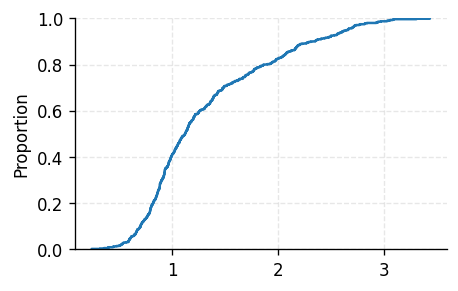

In [19]:
plt.figure(figsize=(4, 2.5),dpi=120)
ax=sns.ecdfplot(data=result[result[0]!=-1], x=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('')
plt.grid(True,alpha=0.3, linestyle='--')